In [26]:
import importlib
import scipy.io
import utils.utils as u 
import utils.preprocessing as p 
import mne
# Reload modules to reflect recent changes:
importlib.reload(u)
importlib.reload(p)

<module 'utils.preprocessing' from 'c:\\Users\\josub\\Desktop\\BDMA\\Padova\\Machine Learning\\Proyect\\PROJECT\\src\\utils\\preprocessing.py'>

In [27]:
file_name="../data/5F-SubjectA-160405-5St-SGLHand.mat"

In [28]:
metadata, eeg_data = u.read_file(file_name)

print("METADATA:")
print(metadata.head())

print("\nEEG DATA (first 5 rows):")
print(eeg_data.head())
print(eeg_data.describe())

print(f"\n Shapes - Metadata: {metadata.shape}, EEG Data: {eeg_data.shape}")


METADATA:
shape: (1, 9)
┌──────────────────┬─────┬─────────┬─────────────┬───┬────────┬─────────┬───────────────┬──────────┐
│ id               ┆ exp ┆ subject ┆ subject_sex ┆ … ┆ date   ┆ samples ┆ sampling_freq ┆ channels │
│ ---              ┆ --- ┆ ---     ┆ ---         ┆   ┆ ---    ┆ ---     ┆ ---           ┆ ---      │
│ str              ┆ str ┆ str     ┆ str         ┆   ┆ str    ┆ i64     ┆ i64           ┆ i64      │
╞══════════════════╪═════╪═════════╪═════════════╪═══╪════════╪═════════╪═══════════════╪══════════╡
│ 201604051923.D09 ┆ 5F  ┆ A       ┆ M           ┆ … ┆ 160405 ┆ 718600  ┆ 200           ┆ 22       │
│ 1BB44            ┆     ┆         ┆             ┆   ┆        ┆         ┆               ┆          │
└──────────────────┴─────┴─────────┴─────────────┴───┴────────┴─────────┴───────────────┴──────────┘

EEG DATA (first 5 rows):
shape: (5, 23)
┌──────┬──────┬──────┬──────┬───┬──────┬──────┬──────┬────────┐
│ Fp1  ┆ Fp2  ┆ F3   ┆ F4   ┆ … ┆ Cz   ┆ Pz   ┆ X5   ┆ marker │

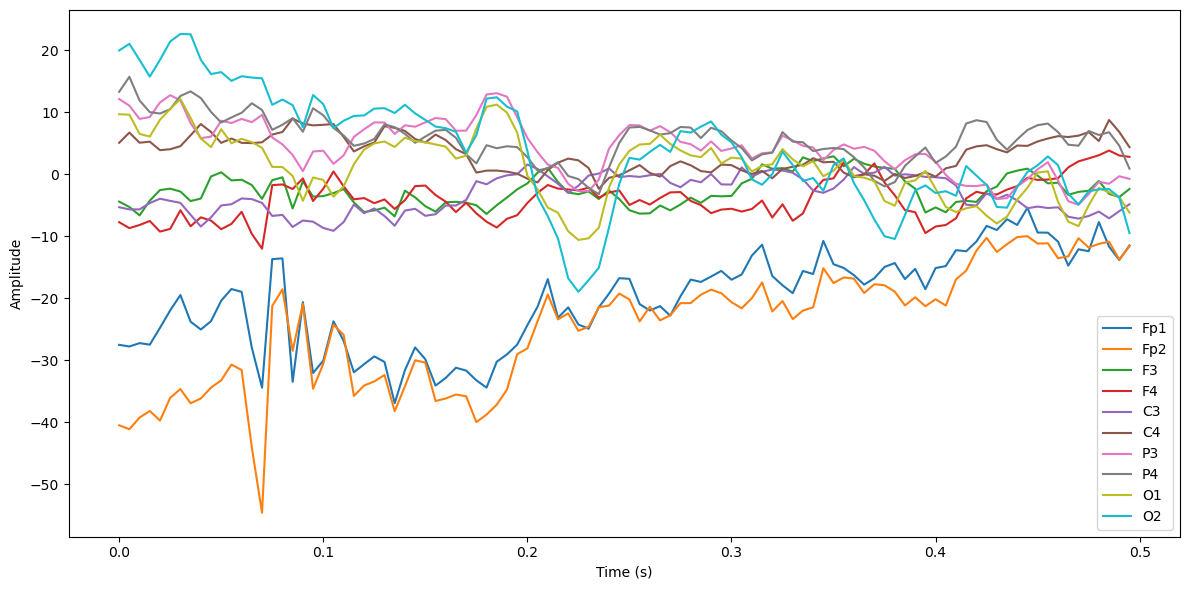

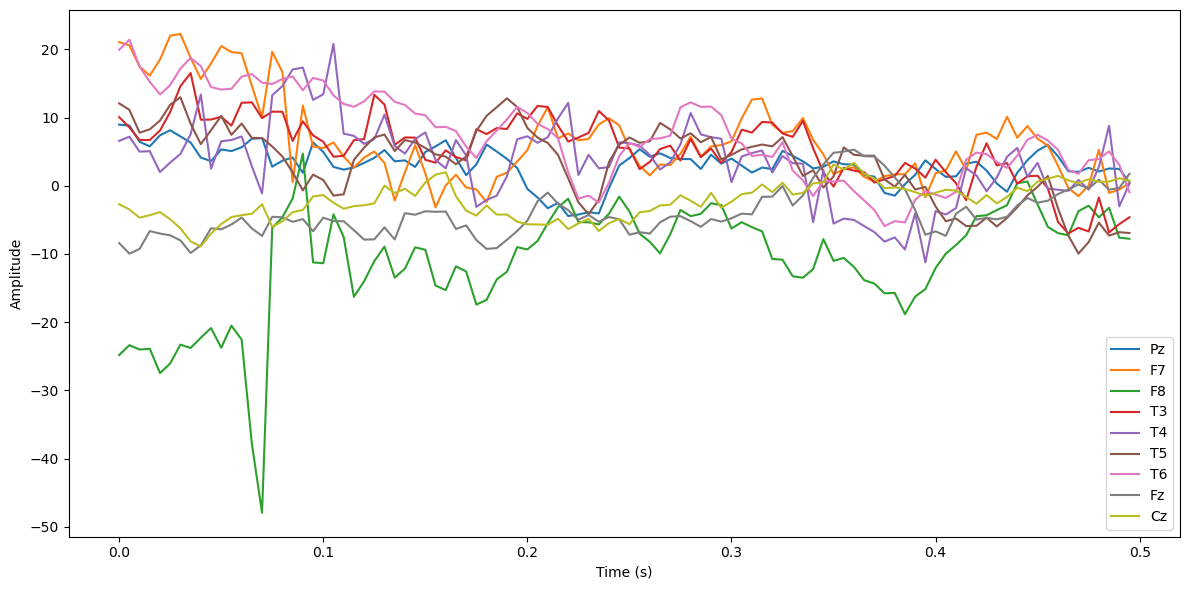

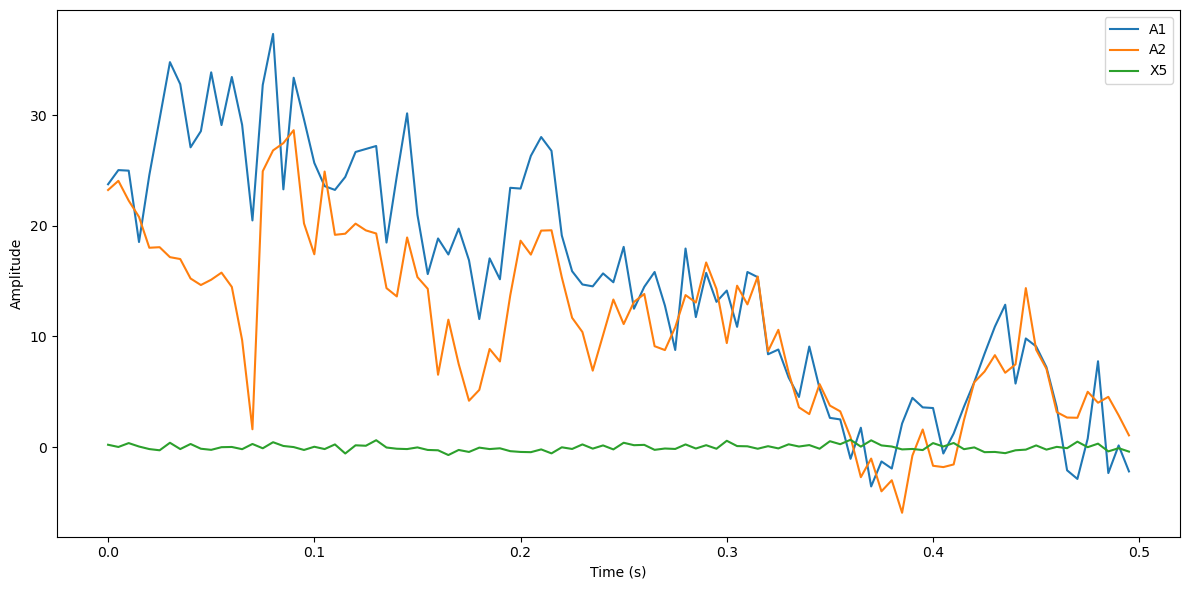

In [29]:
u.plot_eeg_signals(eeg_data, first_sample=1000, window_size=100, freq=metadata["sampling_freq"][0], channels=['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2'])
u.plot_eeg_signals(eeg_data, first_sample=1000, window_size=100, freq=metadata["sampling_freq"][0], channels=['Pz', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz'])
u.plot_eeg_signals(eeg_data, first_sample=1000, window_size=100, freq=metadata["sampling_freq"][0], channels=['A1', 'A2','X5'])

"The fields “nS” and “sampFreq” contain the total number of EEG signal samples and the
sampling rate expressed in Hz or samples per second. Typically, all EEG data were acquired at a sampling
frequency of 200 Hz, unless otherwise indicated in the name of the data file by identifier HFREQ, which
indicates a 1000 Hz sampling rate setting.

The “data” field contains the recording session’s EEG data in the format of 2D Matlab array of size
nSx22, where each column is the time-series of voltage measurements from a single EEG input lead such
as F3 or C3. The ordering of the EEG leads is described in the attached description.txt file and is the same
for the entire dataset. The “data” array describes the measured voltage time-series from 19 EEG leads in
10/20 configuration, two ground leads A1-A2, and one synchronization channel X3. The 22nd
column is the synchronization data from X3 bipolar input port and contains spikes associated with the
beginning and end of each action signal presentation period. The 22nd channel does not contain actual
EEG data and should not be used for any purposes other than verifying synchronization between “data”
and “marker” data, below."

WE DON'T NEED X5 FOR CLASSIFICATION!
(We should ask about A1, A2)

In [30]:
raw=u.read_file_to_raw("../data/5F-SubjectA-160405-5St-SGLHand.mat", drop_channels=['A1','A2','X5'])

Channels: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
Creating RawArray with float64 data, n_channels=19, n_times=718600
    Range : 0 ... 718599 =      0.000 ...  3592.995 secs
Ready.
Successfully created Raw object


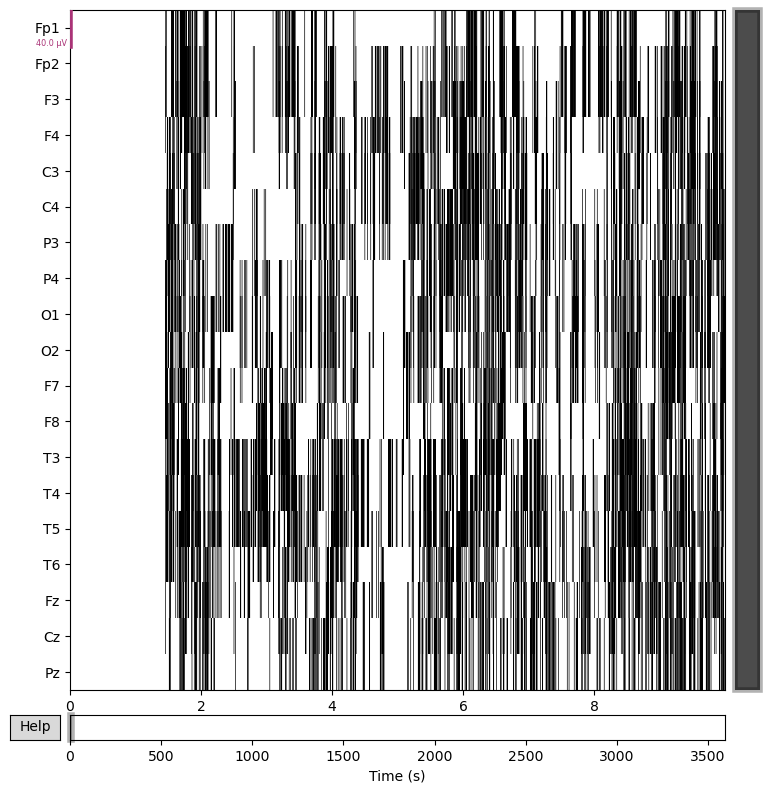

Effective window size : 10.240 (s)
Plotting power spectral density (dB=True).


C:\Users\josub\AppData\Roaming\Python\Python312\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


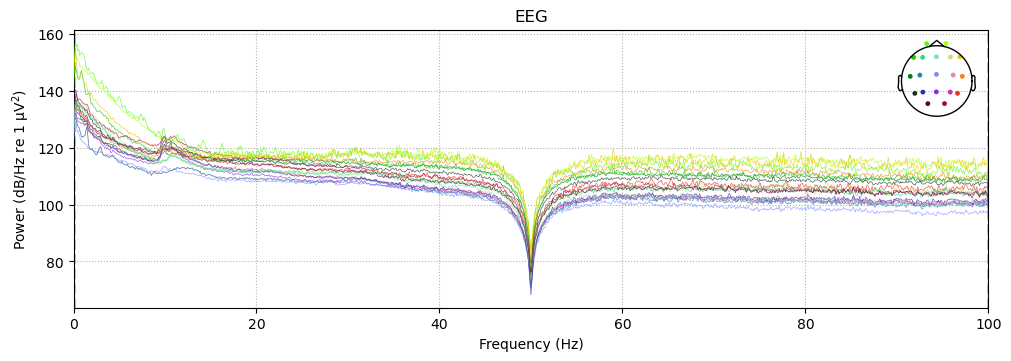

In [31]:
raw.plot()
raw.compute_psd().plot()

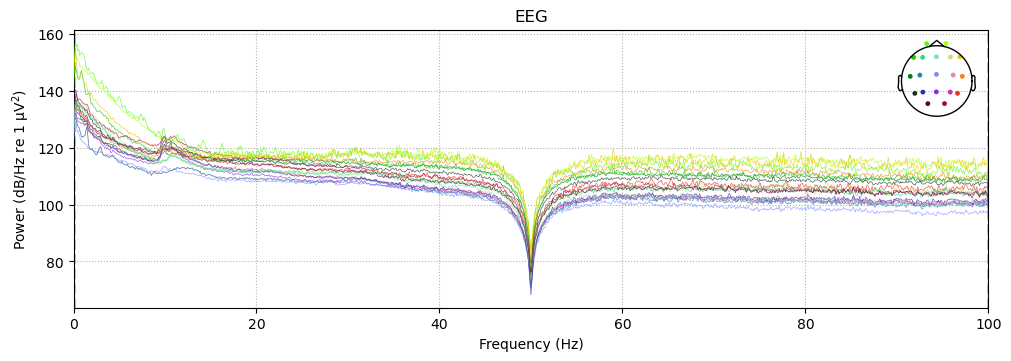

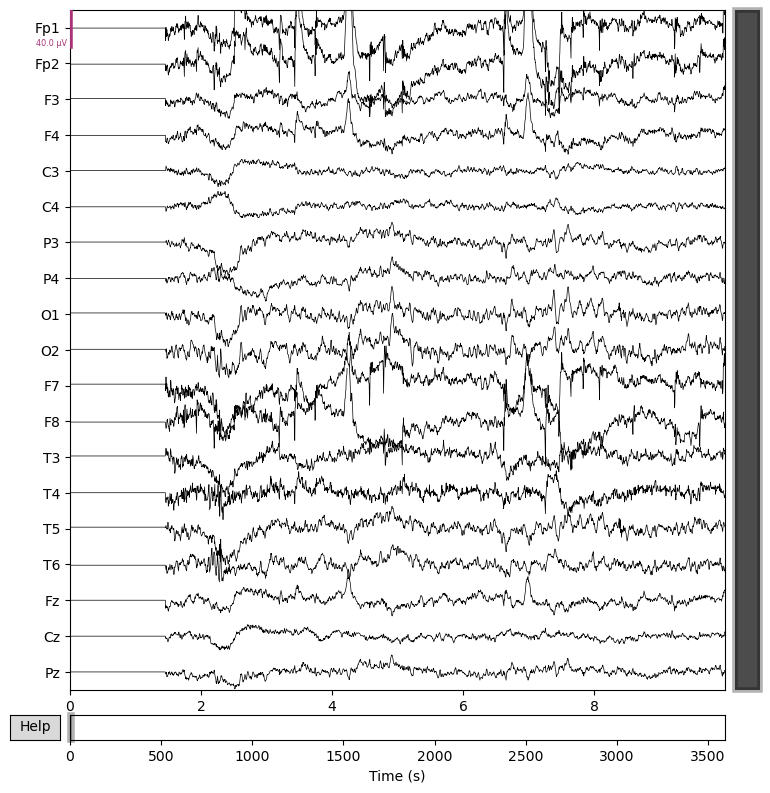

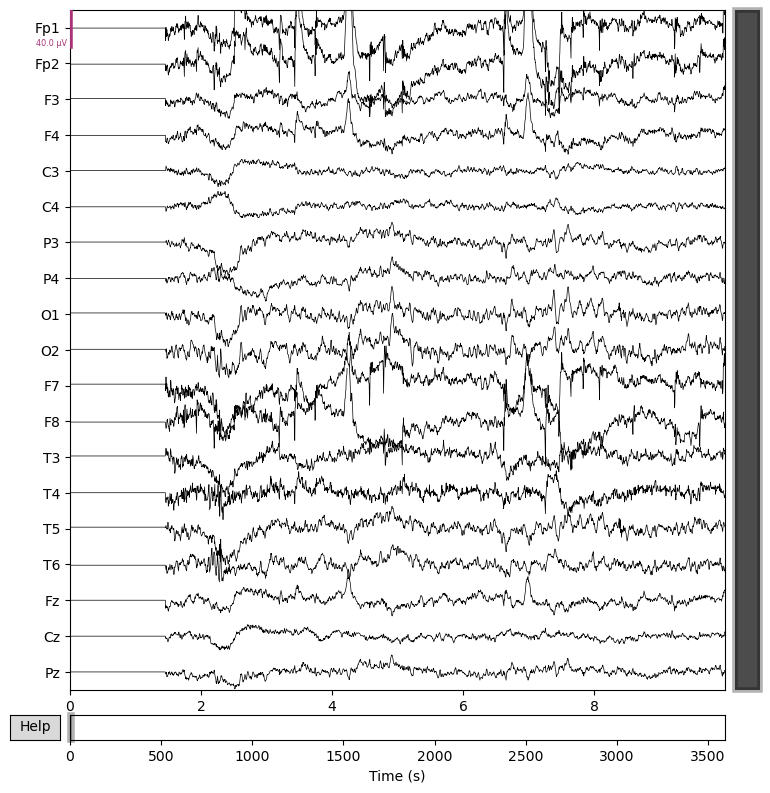

In [23]:
raw=p.scale(raw)
raw.plot()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-12 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-12 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.6 mm
Computing interpolation matrix from 18 sensor positions
Interpolating 1 sensors
Effective window size : 10.240 (s)
Plotting power spectral density (dB=True).


C:\Users\josub\AppData\Roaming\Python\Python312\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


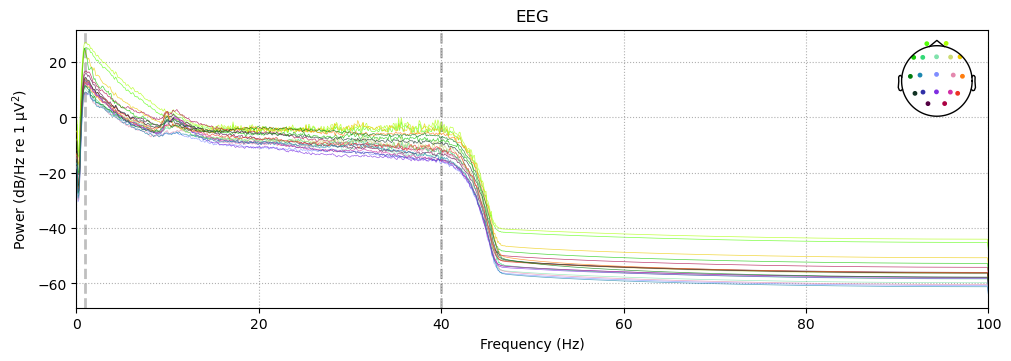

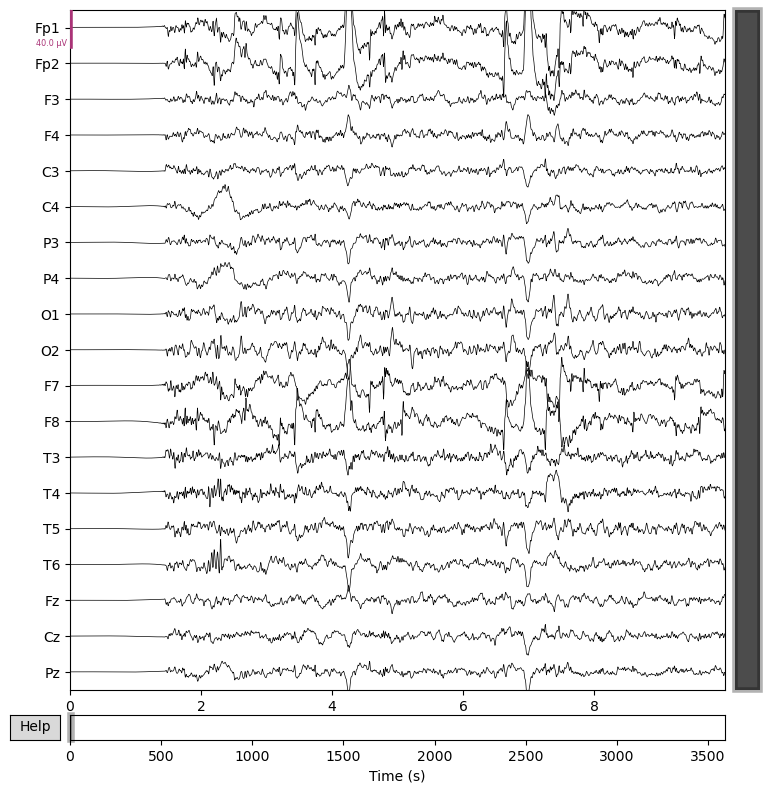

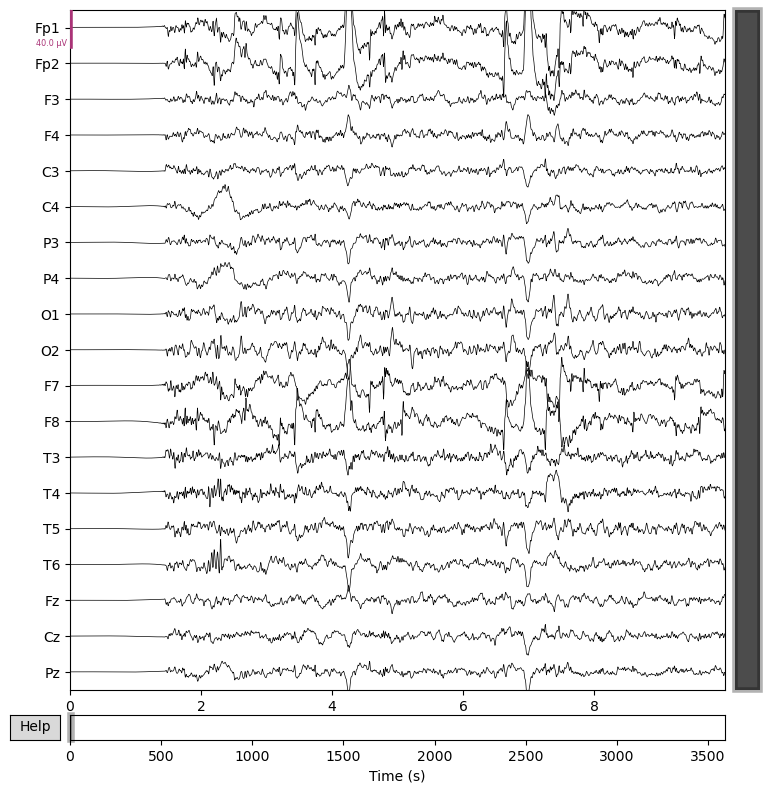

In [25]:
raw=p.PREP(raw, high_cutoff= True, interpolate_bad=True, robust=True)
raw.compute_psd().plot()
raw.plot()

In [11]:
import mne
from mne_icalabel import label_components

# --- Preprocess ---
raw_ica = raw.copy().filter(1., 40.)

# --- Fit ICA ---
ica = mne.preprocessing.ICA(
    n_components=19,
    method='fastica',
    random_state=42
)
ica.fit(raw_ica)

# --- Automatic component classification ---
labels = label_components(raw_ica, ica, method='iclabel')

artifact_components = [
    i for i, lab in enumerate(labels['labels'])
    if lab in ['eye', 'heart', 'muscle', 'channel noise']
]

# --- Remove artifacts ---
ica.exclude = artifact_components
raw_clean = ica.apply(raw_ica.copy())


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components


C:\Users\josub\AppData\Local\Temp\ipykernel_26372\644558116.py:13: RuntimeWarning: Using n_components=19 (resulting in n_components_=19) may lead to an unstable mixing matrix estimation because the ratio between the largest (14) and smallest (8.5e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 17
  ica.fit(raw_ica)


Fitting ICA took 50.7s.


C:\Users\josub\AppData\Local\Temp\ipykernel_26372\644558116.py:16: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  labels = label_components(raw_ica, ica, method='iclabel')
C:\Users\josub\AppData\Local\Temp\ipykernel_26372\644558116.py:16: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended infomax ICA decompositions. To use the extended infomax algorithm, use the 'mne.preprocessing.ICA' instance with the arguments 'ICA(method='infomax', fit_params=dict(extended=True))' (scikit-learn) or 'ICA(method='picard', fit_params=dict(ortho=False, extended=True))' (python-picard).
  labels = label_components(raw_ica, ica, method='iclabel')


Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components


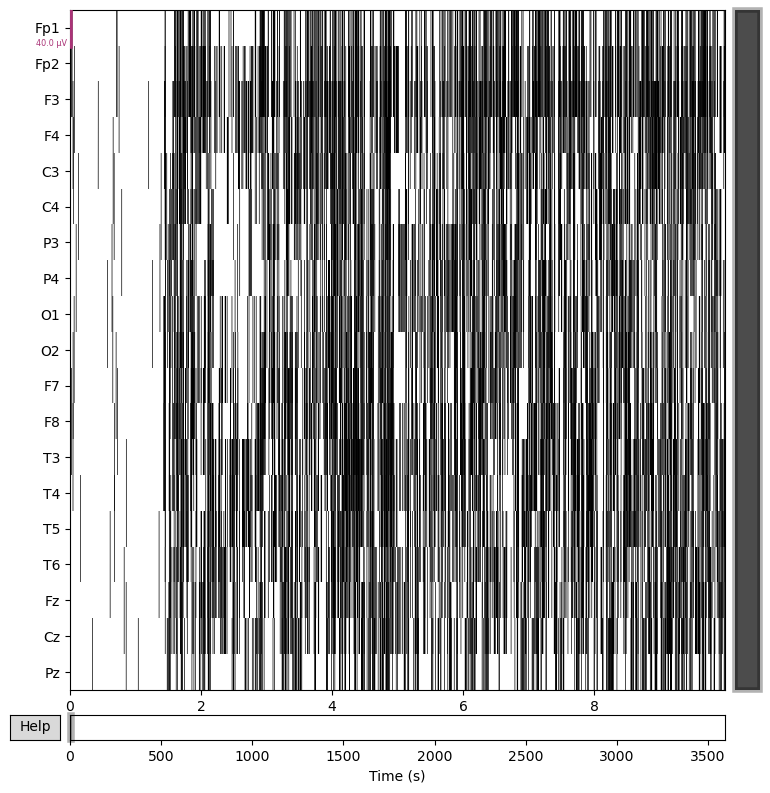

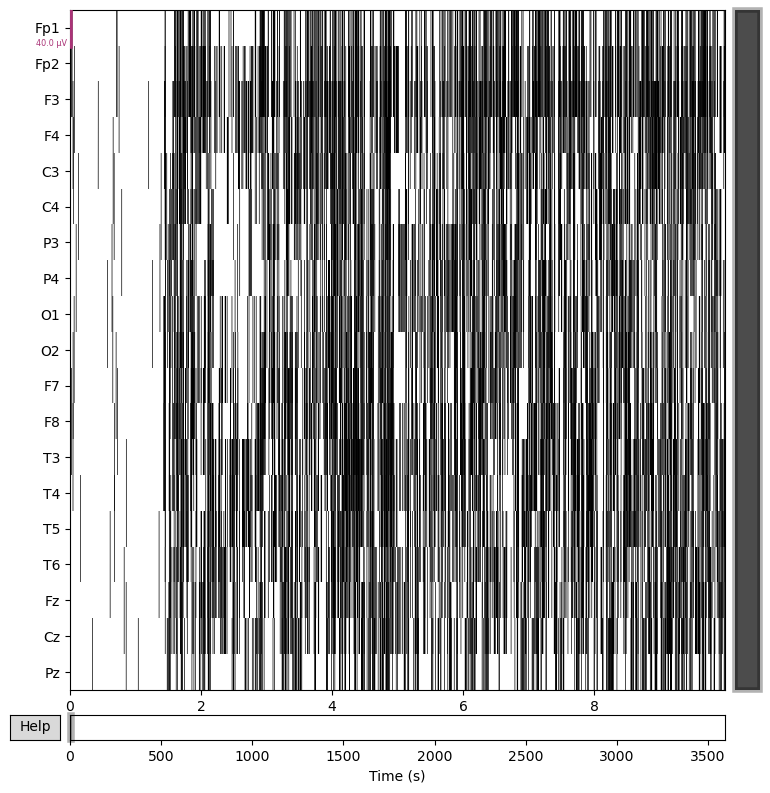

In [12]:
raw_clean.plot()